In [1]:
# Import necassary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = os.environ.get('PWD')

In [2]:
#Load dataset
df_inquiries = pd.read_csv('../data/inquiries_20210713.csv')

# Set time and date

In [3]:
df_inquiries['date'] = pd.to_datetime(df_inquiries['date'])
df_inquiries['time'] = pd.to_datetime(df_inquiries['time'])
df_inquiries['arrival_date'] = pd.to_datetime(df_inquiries['arrival_date'])
df_inquiries['departure_date'] = pd.to_datetime(df_inquiries['departure_date'])

## Look into data

In [4]:
df_inquiries.head(10)


,listing_id,title,date,time,adult_count,children_count,pets_count,arrival_date,departure_date,inquiry_price
0,07ab2635-ca78-516a-bbfb-5d1dbf8b9a5a,Anfrage,2019-01-01,2021-07-13 00:05:36,6.0,2.0,0.0,2019-07-24,2019-07-31,1840.0
1,b334776d-0cf1-51f1-8cdc-37535b280f3d,Anfrage,2019-01-01,2021-07-13 00:07:31,6.0,2.0,0.0,2019-07-24,2019-07-31,1601.0
2,4abe3247-a01b-5554-bfd2-bc27fa523093,Anfrage,2019-01-01,2021-07-13 00:09:12,6.0,2.0,0.0,2019-07-24,2019-07-31,2008.0
3,2d71d636-34d3-567a-b21a-244adf0505c0,Anfrage,2019-01-01,2021-07-13 00:11:58,3.0,0.0,0.0,2019-06-20,2019-07-04,0.0
4,a049f091-cee2-5be3-bf06-b3947ba45507,Anfrage,2019-01-01,2021-07-13 00:17:16,2.0,2.0,0.0,2019-07-27,2019-08-10,2695.0
5,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01,2021-07-13 00:24:34,2.0,1.0,0.0,2019-10-13,2019-10-20,0.0
6,6a263b0f-cfd6-53fd-aa76-eae6662a4aa2,Anfrage,2019-01-01,2021-07-13 00:28:19,2.0,0.0,0.0,2019-06-29,2019-07-13,1380.0
7,e2ddffcd-a3bb-519b-8a2a-d1af265abcd8,Anfrage,2019-01-01,2021-07-13 00:53:58,4.0,4.0,0.0,2019-06-21,2019-07-01,1537.0
8,32128a15-9310-502d-bde2-4f3c8ebd7b65,Anfrage,2019-01-01,2021-07-13 00:54:33,3.0,3.0,0.0,2019-07-27,2019-08-03,0.0
9,93a97dea-2b53-542d-8473-40a3b1035cdb,Anfrage,2019-01-01,2021-07-13 00:55:06,14.0,0.0,1.0,2019-04-26,2019-04-28,0.0


In [15]:
df_inquiries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018005 entries, 0 to 4018004
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      object        
 1   title           object        
 2   date            datetime64[ns]
 3   time            datetime64[ns]
 4   adult_count     float64       
 5   children_count  float64       
 6   pets_count      float64       
 7   arrival_date    datetime64[ns]
 8   departure_date  datetime64[ns]
 9   inquiry_price   float64       
dtypes: datetime64[ns](4), float64(4), object(2)
memory usage: 306.5+ MB


In [16]:
df_inquiries.describe().round(3)

,adult_count,children_count,pets_count,inquiry_price
count,4012271.000,4012271.000,4012271.000,3424008.000
mean,3.137,0.548,0.208,887.142
std,1.987,1.068,0.586,2301.717
min,0.000,0.000,0.000,-3.380
25%,2.000,0.000,0.000,382.000
50%,2.000,0.000,0.000,646.000
75%,4.000,1.000,0.000,1090.000
max,82.000,80.000,500.000,1792331.430


In [17]:
df_inquiries.isna().sum()

listing_id             0
title                  0
date                   0
time                   0
adult_count         5734
children_count      5734
pets_count          5734
arrival_date           0
departure_date         0
inquiry_price     593997
dtype: int64

In [18]:
df_inquiries.nunique()

listing_id        110746
title                  4
date                 731
time               82630
adult_count           52
children_count        33
pets_count            14
arrival_date        1344
departure_date      1352
inquiry_price      89049
dtype: int64

# we want to remove duplicates, which were shown in the profile

In [5]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_inquiries[df_inquiries.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
                                   listing_id         title       date  \
18       9b764e35-72c7-50ca-a5b6-b6c58161eed7       Anfrage 2019-01-01   
1271     c2248782-5ad4-5e35-b175-d74a0eef369a       Anfrage 2019-01-01   
2144     6dfa40ef-aa48-54b2-9018-2de3af649845       Anfrage 2019-01-01   
5617     3b21eb42-3c5a-53cc-8464-0b610db60492       Anfrage 2019-01-02   
14335    ea3133ad-da8d-5c1f-a923-8b2a6fb97de8       Anfrage 2019-01-05   
...                                       ...           ...        ...   
1266434  97cd54c3-baf4-54fd-8305-3286256f835a       Anfrage 2020-08-12   
1293167  b439c7ba-4079-58fc-9894-2b5e1f9b70bd       Anfrage 2020-08-21   
1322721  06010cca-7970-5d4b-bea7-cd71eeaf1593       Anfrage 2020-08-30   
1440587  52a4eaa5-902f-5080-8ec5-b528b88604f3       Anfrage 2020-10-03   
1525635  e7851af0-352a-5e96-b55b-2f809180de85  Direktbuchen 2020-07-18   

                       time  adult_count  chi

In [23]:
df_inquiries.drop_duplicates(keep=False)

,listing_id,title,date,time,adult_count,children_count,pets_count,arrival_date,departure_date,inquiry_price
0,c47741c3-2327-596e-89bc-5fcec81c9ee7,Anfrage,2019-01-01,2021-07-12 00:04:56,2.0,0.0,0.0,2019-06-30,2019-07-13,0.0
1,07ab2635-ca78-516a-bbfb-5d1dbf8b9a5a,Anfrage,2019-01-01,2021-07-12 00:05:36,6.0,2.0,0.0,2019-07-24,2019-07-31,1840.0
2,b334776d-0cf1-51f1-8cdc-37535b280f3d,Anfrage,2019-01-01,2021-07-12 00:07:31,6.0,2.0,0.0,2019-07-24,2019-07-31,1601.0
3,4abe3247-a01b-5554-bfd2-bc27fa523093,Anfrage,2019-01-01,2021-07-12 00:09:12,6.0,2.0,0.0,2019-07-24,2019-07-31,2008.0
4,2d71d636-34d3-567a-b21a-244adf0505c0,Anfrage,2019-01-01,2021-07-12 00:11:58,3.0,0.0,0.0,2019-06-20,2019-07-04,0.0
...,...,...,...,...,...,...,...,...,...,...
4018000,242a498a-e77a-56e1-85a3-8170fee3384f,Verbindliche Anfrage,2020-12-31,2021-07-12 18:22:31,2.0,1.0,0.0,2021-08-02,2021-08-07,550.0
4018001,fc43e8cc-62eb-50ca-a423-e50b9fa91c9c,Verbindliche Anfrage,2020-12-31,2021-07-12 20:01:11,3.0,0.0,1.0,2021-08-21,2021-09-04,2408.0
4018002,638ab1f2-a60c-5b34-8c89-2c66de69c111,Verbindliche Anfrage,2020-12-31,2021-07-12 21:26:52,2.0,1.0,0.0,2021-08-01,2021-08-08,1267.0
4018003,8e8344f9-2c96-50e4-bb6f-700d1b82a6b7,Verbindliche Anfrage,2020-12-31,2021-07-12 23:38:06,2.0,0.0,0.0,2021-07-25,2021-08-06,1787.0


In [5]:
df_inquiries.nunique()

listing_id        29655
title                 4
date                731
time              76731
adult_count          42
children_count       26
pets_count           14
arrival_date       1285
departure_date     1289
inquiry_price     16543
dtype: int64

Dataset Inquiries: check to see what these values look like
- adult_count max
- children_count max
- pets_count max
- inquiries_prices --> everything (NA, Zeros, min, max)
- convert some columns to date time
- duplicate rows

In [6]:
df_inquiries.title.unique()

array(['Anfrage', 'Direktbuchen', 'Externe Buchung',
       'Verbindliche Anfrage'], dtype=object)

In [7]:
df_inquiries['adult_count'].sort_values().max()

55.0

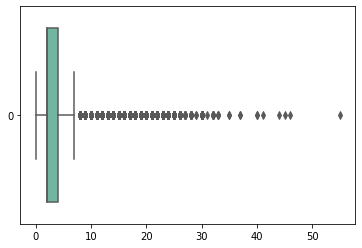

In [8]:
ax = sns.boxplot(data=df_inquiries['adult_count'], orient="h", palette="Set2")

In [9]:
df_inquiries['children_count'].sort_values().max()

40.0

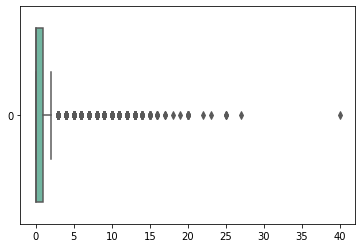

In [10]:
ax = sns.boxplot(data=df_inquiries['children_count'], orient="h", palette="Set2")

In [11]:
df_inquiries['pets_count'].sort_values().max()

500.0

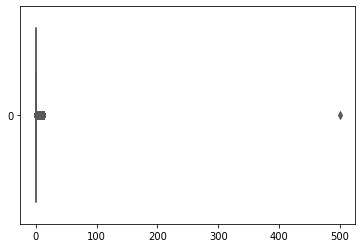

In [16]:
ax = sns.boxplot(data=df_inquiries['pets_count'], orient="h", palette="Set2")

# all these values indicate outliers, even if they are accurate

In [12]:
# number of missing for inquiries_price is high


df_inquiries['inquiry_price'].isna().sum()

242020

In [13]:
# the values in inquiry_price

df_inquiries['inquiry_price'].value_counts()

0.00       41769
420.00     12171
350.00     11347
560.00     10725
300.00     10646
           ...  
768.90         1
716.29         1
840.43         1
557.80         1
1430.57        1
Name: inquiry_price, Length: 16543, dtype: int64

In [14]:
df_inquiries['inquiry_price'].sort_values().max()

750000.0

# we see ranges with outliers, these should be removed for all these variables

# before we do this, we want to see what the base prices for the outlier properties look like 

In [40]:
pricy_inquiries = df_inquiries[df_inquiries.inquiry_price > df_inquiries.inquiry_price.quantile(.95)]



In [37]:
top_inquiries.head()

,listing_id,title,date,time,adult_count,children_count,pets_count,arrival_date,departure_date,inquiry_price
5,a049f091-cee2-5be3-bf06-b3947ba45507,Anfrage,2019-01-01,2021-07-12 00:17:16,2.0,2.0,0.0,2019-07-27,2019-08-10,2695.0
6,14c7adbe-f6be-58d8-a925-7d4f891f1a94,Anfrage,2019-01-01,2021-07-12 00:19:09,9.0,0.0,0.0,2019-06-29,2019-07-06,2700.0
9,b9a03002-7cb0-5ede-993e-06b7da138951,Anfrage,2019-01-01,2021-07-12 00:37:24,2.0,0.0,0.0,2019-06-22,2019-07-06,4340.0
222,b0be0ec1-0fb7-5206-b645-c87a8efaf536,Anfrage,2019-01-01,2021-07-12 10:15:01,4.0,0.0,3.0,2019-08-10,2019-08-17,2800.0
254,89767a88-2713-54bf-a3d3-d73bac93d6ea,Anfrage,2019-01-01,2021-07-12 10:29:34,7.0,0.0,0.0,2019-08-08,2019-08-15,4200.0


In [39]:
# load the price dataset

df_prices = pd.read_csv('../data/prices_20210707.csv')

In [43]:
df_pricy_properties = pd.merge(pricy_inquiries, df_prices, left_on='listing_id', right_on='listing_id', how='left')

In [44]:
df_pricy_properties.nunique()

listing_id             32835
title                      4
date                     731
time                   59071
adult_count               42
children_count            28
pets_count                11
arrival_date            1070
departure_date          1076
inquiry_price          20533
min_days                  17
date_from               4143
date_to                 4072
price_per_day_from      6637
price_per_week_from     6195
dtype: int64

In [42]:
df_pricy_properties.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,title,date,time,adult_count,children_count,pets_count,arrival_date,departure_date,inquiry_price
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN


In [9]:
sns.displot(data=df_inquiries, x=inquiry)

NameError: name 'inquiry_price' is not defined